# 20 Newsgroups Exploration

Goal:
- Inspect the 20 Newsgroups dataset (class distribution, example texts).
- Sanity-check preprocessing and tokenization before training DistilBERT.

In [ ]:
#install dependencies
%pip install torch==2.2.0 transformers==4.39.1 tokenizers==0.15.2 datasets==2.19.0 scikit-learn==1.4.0 matplotlib


Note: you may need to restart the kernel to use updated packages.


In [15]:
from sklearn.datasets import fetch_20newsgroups
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [28]:
train_bunch = fetch_20newsgroups(subset="train", remove=("headers", "footers", "quotes"))
test_bunch  = fetch_20newsgroups(subset="test",  remove=("headers", "footers", "quotes"))

print("num training samples:", len(train_bunch.data))
print("num test samples:", len(test_bunch.data))
print("num target classes:", len(train_bunch.target_names))

label_names = train_bunch.target_names
train_labels = train_bunch.target

counts = Counter(train_labels)
for label_id, count in counts.items():
    print(f"{label_id:2d}  {label_names[label_id]:25s}  {count}")

num training samples: 11314
num test samples: 7532
num target classes: 20
 7  rec.autos                  594
 4  comp.sys.mac.hardware      578
 1  comp.graphics              584
14  sci.space                  593
16  talk.politics.guns         546
13  sci.med                    594
 3  comp.sys.ibm.pc.hardware   590
 2  comp.os.ms-windows.misc    591
 8  rec.motorcycles            598
19  talk.religion.misc         377
 6  misc.forsale               585
 0  alt.atheism                480
12  sci.electronics            591
 5  comp.windows.x             593
10  rec.sport.hockey           600
 9  rec.sport.baseball         597
15  soc.religion.christian     599
17  talk.politics.mideast      564
18  talk.politics.misc         465
11  sci.crypt                  595


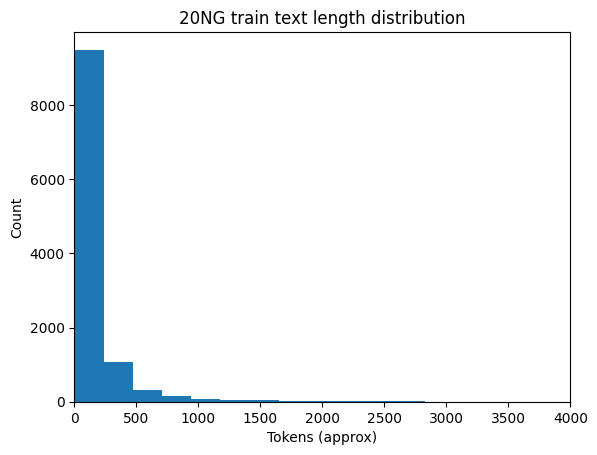

In [29]:
train_lengths = [len(text.split()) for text in train_bunch.data]

plt.hist(train_lengths, bins=50) 
plt.xlabel("Tokens (approx)") 
plt.ylabel("Count") 
plt.title("20NG train text length distribution") 
plt.xlim(0, 4000)
plt.show()

In [47]:
idx = 13
print("LABEL:", label_names[train_bunch.target[idx]])
print("LENGTH (tokens):", len(train_bunch.data[idx].split()))
print("TEXT:\n", train_bunch.data[idx][:1000])

LABEL: sci.space
LENGTH (tokens): 611
TEXT:
 
   {Description of "External Tank" option for SSF redesign deleted}


Yo Ken, let's keep on-top of things! Both the "External Tank" and
"Wingless Orbiter" options have been deleted from the SSF redesign
options list. Today's (4/23) edition of the New York Times reports
that O'Connor told the panel that some redesign proposals have
been dropped, such as using the "giant external fuel tanks used
in launching space shuttles," and building a "station around
an existing space shuttle with its wings and tail removed."

Currently, there are three options being considered, as presented
to the advisory panel meeting yesterday (and as reported in
today's Times).

Option "A" - Low Cost Modular Approach
This option is being studied by a team from MSFC. {As an aside,
there are SSF redesign teams at MSFC, JSC, and LaRC supporting
the SRT (Station Redesign Team) in Crystal City. Both LeRC and
Reston folks are also on-site at these locations, helping the r